<a href="https://colab.research.google.com/github/angelsmreyes/parkinson/blob/main/parkinson_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['text.color'] = 'k'

### Exploratory Data Analysis

**Se cargan los datos de parkinson dataset que contiene grabaciones de voz de 31 participantes, dentro de los cuales 23 presentan la enfermedad**

In [2]:
parkinson_vocal = pd.read_csv('/content/drive/MyDrive/datasets/parkinsons.data')

In [3]:
parkinson_vocal.head(4)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975


In [4]:
parkinson_vocal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [5]:
parkinson_vocal.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,0.015664,0.017878,0.024081,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,0.010153,0.012024,0.016947,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,0.004550,0.005700,0.007190,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,0.008245,0.009580,0.013080,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,0.012790,0.013470,0.018260,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,0.020265,0.022380,0.029400,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,0.056470,0.079400,0.137780,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


**The target variable is status, in which 1 represents that the participant has parkinson and 0 that they don't**


In [6]:
parkinson_vocal.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

**There are not missing in the dataset**

In [7]:
parkinson_vocal.shape

(195, 24)

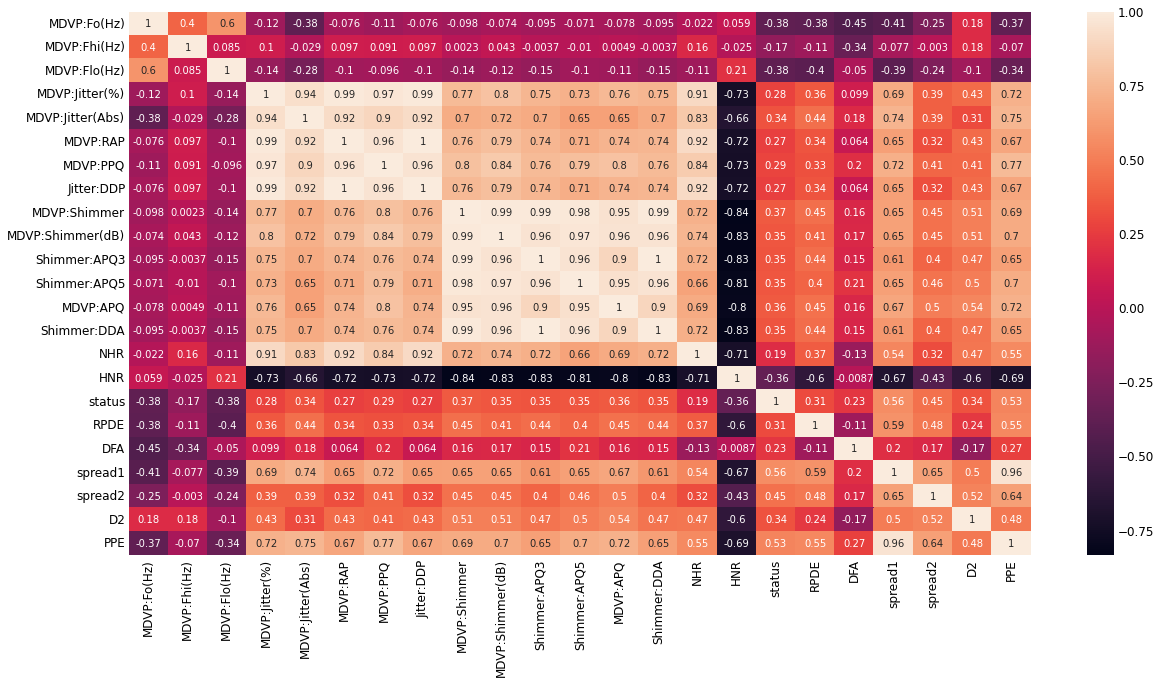

In [8]:
plt.figure(figsize=(18, 10))
sns.heatmap(parkinson_vocal.corr(), annot=True)

**Since there is colinearity between the variables, it is necessary a model that wont be affected by that**

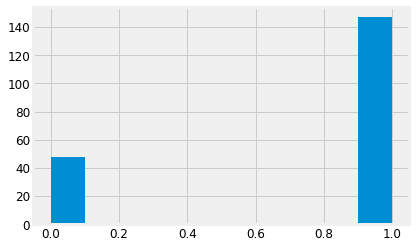

In [9]:
parkinson_vocal.status.hist()

### Spliting in target and predictors

In [10]:
parkinson_vocal.drop('name', axis=1, inplace=True)

In [11]:
parkinson_vocal.head(2) 

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674


In [12]:
y = parkinson_vocal.status

In [13]:
X = parkinson_vocal[[col for col in parkinson_vocal.columns if col != 'status']]

### Scaling the predictors

In [14]:
from sklearn.preprocessing import RobustScaler

In [15]:
X_r = RobustScaler().fit_transform(X)

In [16]:
X_r[:3]

array([[-0.44170744, -0.20736935, -0.52609573,  0.74263764,  1.        ,
         0.55172414,  1.36038186,  0.55214724,  0.97146866,  1.01736973,
         0.75124792,  1.39296875,  0.70159314,  0.75124792,  0.53005326,
        -0.17898766, -0.48822753,  1.06779992,  0.64665177,  0.45380827,
        -0.11183061,  0.78423599],
       [-0.40477323, -0.30420962,  0.17054417,  1.21382843,  1.25      ,
         0.98850575,  2.03818616,  0.9892638 ,  1.79466791,  2.00992556,
         1.54326123,  2.47734375,  1.55759804,  1.54381586,  0.38701496,
        -0.5104211 , -0.2261265 ,  1.11642027,  1.17221405,  1.11271077,
         0.23323262,  1.51149928],
       [-0.49247665, -0.50052047,  0.1299179 ,  1.42381562,  1.5       ,
         1.35172414,  2.44391408,  1.35582822,  1.37324602,  1.29528536,
         1.2296173 ,  1.96171875,  1.08088235,  1.2296173 ,  0.0725336 ,
        -0.24398128, -0.39733183,  1.18261329,  0.91009713,  0.87990961,
        -0.03586806,  1.19954297]])

### Spliting in training and test data

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_r, y, test_size=0.2)

In [19]:
print('Train dimension: ', X_train.shape, y_train.shape)
print('\n--------------\n')
print('Test dimension: ', X_test.shape, y_test.shape)

Train dimension:  (156, 22) (156,)

--------------

Test dimension:  (39, 22) (39,)


### Aplicando GaussianNB model

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
gnb = GaussianNB()

In [ ]:
gnb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_pred_g = gnb.predict(X_test)

In [ ]:
df_g = pd.DataFrame({'actual':y_test, 'predicted':y_pred_g})

In [ ]:
df_g.head(3)

,actual,predicted
31,0,0
182,1,0
21,1,1


**Model Evaluation**

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [ ]:
metrics.confusion_matrix(y_test, y_pred_g)

array([[ 9,  1],
       [12, 17]])

In [ ]:
print(classification_report(y_test, y_pred_g))

              precision    recall  f1-score   support

           0       0.43      0.90      0.58        10
           1       0.94      0.59      0.72        29

    accuracy                           0.67        39
   macro avg       0.69      0.74      0.65        39
weighted avg       0.81      0.67      0.69        39



In [ ]:
print(accuracy_score(y_pred_g, y_test))

0.6666666666666666


In [ ]:
y_pred_g_test = gnb.predict(X_train)

In [ ]:
print(accuracy_score(y_pred_g_test, y_train))

0.7051282051282052


In [ ]:
print(gnb.score(X_train, y_train))

0.7051282051282052


In [ ]:
print(gnb.score(X_test, y_test))

0.6666666666666666


It looks like there is overfitting

### SVM model

In [20]:
from sklearn.svm import LinearSVC
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [21]:
clf = LinearSVC()
clf.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [22]:
y_pred = clf.predict(X_test)

**Model evaluation**

In [23]:
print(accuracy_score(y_pred, y_test))

0.8717948717948718


In [24]:
y_pred_train = clf.predict(X_train)

In [25]:
print(accuracy_score(y_pred_train, y_train))

0.8717948717948718


**There is not overfitting in the model**

In [26]:
metrics.confusion_matrix(y_test, y_pred)

array([[ 1,  1],
       [ 4, 33]])

In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.20      0.50      0.29         2
           1       0.97      0.89      0.93        37

    accuracy                           0.87        39
   macro avg       0.59      0.70      0.61        39
weighted avg       0.93      0.87      0.90        39



In [28]:
clf.score(X_test, y_test)

0.8717948717948718

In [29]:
clf.score(X_train, y_train)

0.8717948717948718

There is not overfitting with Support Vector Machine model

### Hyperparameter tuning

In [30]:
from sklearn.model_selection import GridSearchCV

In [31]:
from sklearn.svm import SVC

In [32]:
classifier = SVC()

In [33]:
grid = GridSearchCV(classifier, {
    'gamma': ['auto', 'scale'],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C':[1, 4, 8, 10, 20]
}, cv=5)

In [34]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 4, 8, 10, 20], 'gamma': ['auto', 'scale'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [35]:
grid.best_params_

{'C': 4, 'gamma': 'auto', 'kernel': 'rbf'}

In [36]:
grid.best_score_

0.884475806451613

In [37]:
df_cv = pd.DataFrame(grid.cv_results_)

In [38]:
df_cv.sort_values(by='mean_test_score', ascending=False).head(4)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
10,0.001636,0.000371,0.000597,0.000049,4,auto,rbf,"{'C': 4, 'gamma': 'auto', 'kernel': 'rbf'}",0.90625,0.838710,0.838710,0.935484,0.903226,0.884476,0.039030,1
14,0.001350,0.000041,0.000507,0.000018,4,scale,rbf,"{'C': 4, 'gamma': 'scale', 'kernel': 'rbf'}",0.90625,0.838710,0.838710,0.935484,0.903226,0.884476,0.039030,1
22,0.001603,0.000205,0.000623,0.000114,8,scale,rbf,"{'C': 8, 'gamma': 'scale', 'kernel': 'rbf'}",0.90625,0.806452,0.806452,0.935484,0.870968,0.865121,0.052079,3
18,0.001284,0.000043,0.000490,0.000017,8,auto,rbf,"{'C': 8, 'gamma': 'auto', 'kernel': 'rbf'}",0.90625,0.806452,0.806452,0.935484,0.870968,0.865121,0.052079,3


In [39]:
clf2 = SVC(C=10, gamma='scale', kernel='rbf')

In [40]:
clf2.fit(X_train, y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [41]:
y_pred2 = clf2.predict(X_test)

**Model Evaluation**

In [42]:
print(accuracy_score(y_pred2, y_test))

0.9487179487179487


In [43]:
clf2.score(X_test, y_test)

0.9487179487179487

In [44]:
clf2.score(X_train, y_train)

0.9423076923076923

In [45]:
metrics.confusion_matrix(y_test, y_pred2)

array([[ 1,  1],
       [ 1, 36]])

In [46]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.97      0.97      0.97        37

    accuracy                           0.95        39
   macro avg       0.74      0.74      0.74        39
weighted avg       0.95      0.95      0.95        39



In [47]:
from sklearn.metrics import roc_curve, roc_auc_score

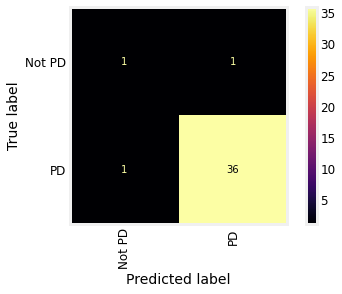

In [48]:
metrics.plot_confusion_matrix(clf2, X_test, y_test,
                              display_labels=['Not PD', 'PD'],
                              xticks_rotation='vertical',
                              cmap='inferno')
plt.grid(b=None)

In [54]:
metrics.roc_auc_score(y_test, y_pred2)

0.7364864864864865

### Decission Tree

In [55]:
from sklearn.tree import DecisionTreeClassifier

In [56]:
tree = DecisionTreeClassifier()

In [57]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [58]:
y_pred_t = tree.predict(X_test)

In [59]:
print(accuracy_score(y_pred_t, y_test))

0.9487179487179487


**Checking overfitting**

In [60]:
y_pred_train = tree.predict(X_train)

In [61]:
print(accuracy_score(y_pred_train, y_train))

1.0


In [62]:
metrics.roc_auc_score(y_test, y_pred_t)

0.7364864864864865

### Logistic Regression

In [63]:
from sklearn.linear_model import LogisticRegression

In [64]:
lr = LogisticRegression()

In [65]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [66]:
y_pred_l = lr.predict(X_test)

In [67]:
print(accuracy_score(y_pred_l, y_test))

0.8717948717948718


**Checking overfitting**

In [68]:
y_pred_l_train = lr.predict(X_train)

In [69]:
print(accuracy_score(y_pred_l_train, y_train))

0.8525641025641025
